In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
df_run = pd.read_csv('SraRunTable.txt')
df_run.index = df_run.Run
df_run.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample Name,source_name,SRA Study,Group
Run,,,,,,,,,,,,,,,,,,,,,
SRR3362719,SRR3362719,RNA-Seq,200,8964418000,PRJNA318253,SAMN04692180,6115787912,GEO,public,sra,...,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-11-17T00:00:00Z,GSM2114348,Blood,SRP073191,anti-dsDNA
SRR3362721,SRR3362721,RNA-Seq,200,9447560200,PRJNA318253,SAMN04692181,6532430876,GEO,public,sra,...,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-11-17T00:00:00Z,GSM2114349,Blood,SRP073191,anti-dsDNA and anti-ENA
SRR3362723,SRR3362723,RNA-Seq,200,7994804000,PRJNA318253,SAMN04692183,5378131518,GEO,public,sra,...,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-11-17T00:00:00Z,GSM2114350,Blood,SRP073191,anti-dsDNA and anti-ENA
SRR3362725,SRR3362725,RNA-Seq,200,7081999200,PRJNA318253,SAMN04692147,4808095017,GEO,public,"sra,unknown_contigs",...,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-11-17T00:00:00Z,GSM2114351,Blood,SRP073191,anti-dsDNA and anti-ENA
SRR3362727,SRR3362727,RNA-Seq,200,9673064000,PRJNA318253,SAMN04692151,6241313900,GEO,public,sra,...,PAIRED,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2016-11-17T00:00:00Z,GSM2114352,Blood,SRP073191,anti-dsDNA and anti-ENA


In [3]:
df_run.columns

Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'Bytes', 'Center Name', 'Consent', 'DATASTORE filetype',
       'DATASTORE provider', 'DATASTORE region', 'disease_state', 'Experiment',
       'GEO_Accession (exp)', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'Sample Name', 'source_name', 'SRA Study', 'Group'],
      dtype='object')

In [4]:
df_run['disease_state']

Run
SRR3362719    Systemic lupus erythematosus
SRR3362721    Systemic lupus erythematosus
SRR3362723    Systemic lupus erythematosus
SRR3362725    Systemic lupus erythematosus
SRR3362727    Systemic lupus erythematosus
SRR3362734    Systemic lupus erythematosus
SRR3362736                         control
SRR3362738                         control
SRR3362713    Systemic lupus erythematosus
SRR3362717    Systemic lupus erythematosus
SRR3362731    Systemic lupus erythematosus
SRR3362733    Systemic lupus erythematosus
SRR3362735                         control
SRR3362737                         control
SRR3362715    Systemic lupus erythematosus
SRR3362729    Systemic lupus erythematosus
Name: disease_state, dtype: object

In [5]:
pd.read_csv('output/SRR3362713.tsv', sep='\t')

,virus,num_hit,rate_hit
0,NC_022518.1_Human_endogenous_retrovirus_K113_c...,3866,0.000068
1,"NC_001405.1_Human_adenovirus_C,_complete_genome",376,0.000007
2,gi|12084981|lcl|HPV71REF.1|_Human_papillomavir...,248,0.000004


In [6]:
for i, srr in enumerate(df_run.Run):
    d = pd.read_csv('output/{}.tsv'.format(srr), sep='\t')
    d = d[['virus', 'num_hit']]
    d.columns = ['virus', srr]
    
    if i == 0:
        df = d.copy()
    else:
        df = pd.merge(df, d, how='outer')
df = df.fillna(0)
df.index = df['virus']
df = df.drop(columns=['virus'])

In [7]:
df

,SRR3362719,SRR3362721,SRR3362723,SRR3362725,SRR3362727,SRR3362734,SRR3362736,SRR3362738,SRR3362713,SRR3362717,SRR3362731,SRR3362733,SRR3362735,SRR3362737,SRR3362715,SRR3362729
virus,,,,,,,,,,,,,,,,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,2070.0,4192.0,2247.0,2178.0,4184.0,3868.0,1626.0,2381.0,3866.0,3076.0,2842.0,1912.0,4796.0,1796.0,2182.0,2584.0
"gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome",12.0,156.0,82.0,40.0,42.0,36.0,52.0,40.0,248.0,42.0,42.0,18.0,200.0,24.0,34.0,12.0
"NC_001405.1_Human_adenovirus_C,_complete_genome",0.0,24.0,0.0,64.0,10.0,10.0,0.0,74.0,376.0,0.0,10.0,0.0,398.0,128.0,10.0,0.0
"NC_001716.2_Human_herpesvirus_7,_complete_genome",0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"NC_001802.1_Human_immunodeficiency_virus_1,_complete_genome",0.0,0.0,110.0,98.0,258.0,42.0,62.0,1554.0,0.0,0.0,0.0,0.0,0.0,4224.0,22.0,0.0
"NC_006273.2_Human_herpesvirus_5_strain_Merlin,_complete_genome",0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
"NC_000898.1_Human_herpesvirus_6B,_complete_genome",0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"gi|6970427|lcl|HPV82REF.1|_Human_papillomavirus_82_(HPV82),_complete_genome",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,68.0,0.0


In [8]:
df_run.sort_values(by="disease_state").index

Index(['SRR3362719', 'SRR3362721', 'SRR3362723', 'SRR3362725', 'SRR3362727',
       'SRR3362734', 'SRR3362713', 'SRR3362717', 'SRR3362731', 'SRR3362733',
       'SRR3362715', 'SRR3362729', 'SRR3362736', 'SRR3362738', 'SRR3362735',
       'SRR3362737'],
      dtype='object', name='Run')

In [9]:
df[df_run.sort_values(by="disease_state").index]

,SRR3362719,SRR3362721,SRR3362723,SRR3362725,SRR3362727,SRR3362734,SRR3362713,SRR3362717,SRR3362731,SRR3362733,SRR3362715,SRR3362729,SRR3362736,SRR3362738,SRR3362735,SRR3362737
virus,,,,,,,,,,,,,,,,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,2070.0,4192.0,2247.0,2178.0,4184.0,3868.0,3866.0,3076.0,2842.0,1912.0,2182.0,2584.0,1626.0,2381.0,4796.0,1796.0
"gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome",12.0,156.0,82.0,40.0,42.0,36.0,248.0,42.0,42.0,18.0,34.0,12.0,52.0,40.0,200.0,24.0
"NC_001405.1_Human_adenovirus_C,_complete_genome",0.0,24.0,0.0,64.0,10.0,10.0,376.0,0.0,10.0,0.0,10.0,0.0,0.0,74.0,398.0,128.0
"NC_001716.2_Human_herpesvirus_7,_complete_genome",0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"NC_001802.1_Human_immunodeficiency_virus_1,_complete_genome",0.0,0.0,110.0,98.0,258.0,42.0,0.0,0.0,0.0,0.0,22.0,0.0,62.0,1554.0,0.0,4224.0
"NC_006273.2_Human_herpesvirus_5_strain_Merlin,_complete_genome",0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0
"NC_000898.1_Human_herpesvirus_6B,_complete_genome",0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"gi|6970427|lcl|HPV82REF.1|_Human_papillomavirus_82_(HPV82),_complete_genome",0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,68.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_dis = df[df_run.sort_values(by="disease_state").index].copy()
df_dis.columns = df_run.loc[list(df_dis.columns), 'disease_state']

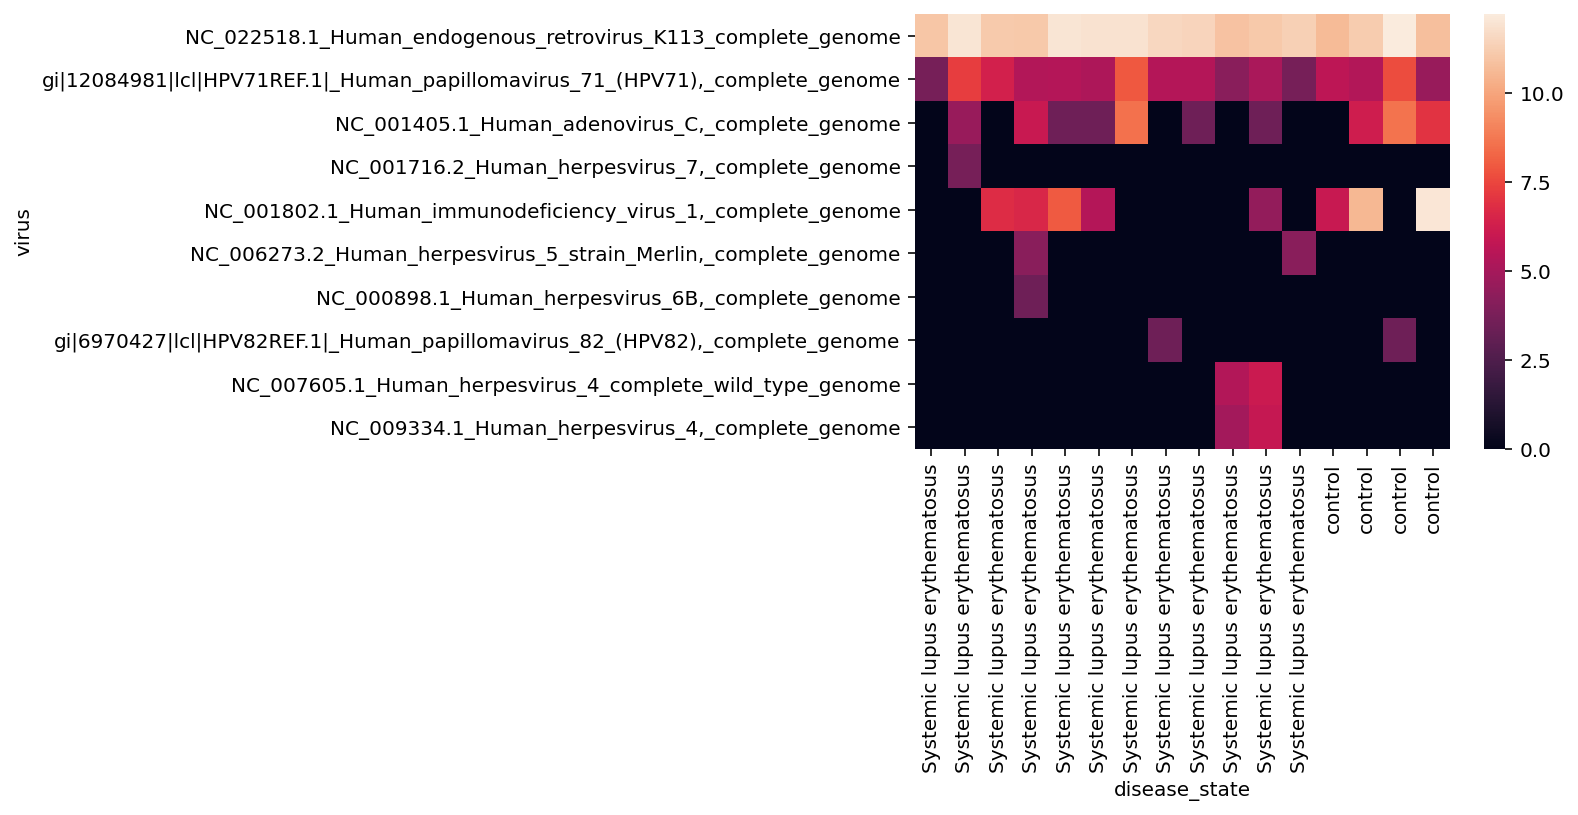

In [11]:
sns.heatmap(np.log2(df_dis + 1))
# plt.savefig('virus.pdf', bbox_inches='tight')

In [21]:
from scipy import stats

list_pvalue = []
for pos, row in df_dis.iterrows():
#     print(row)
    list_pvalue.append(stats.mannwhitneyu(list(row['Systemic lupus erythematosus']), list(row['control']))[1])
df_pvalue = pd.DataFrame(list_pvalue)
df_pvalue.index = df_dis.index
df_pvalue

,0
virus,
NC_022518.1_Human_endogenous_retrovirus_K113_complete_genome,0.215278
"gi|12084981|lcl|HPV71REF.1|_Human_papillomavirus_71_(HPV71),_complete_genome",0.313049
"NC_001405.1_Human_adenovirus_C,_complete_genome",0.066047
"NC_001716.2_Human_herpesvirus_7,_complete_genome",0.332503
"NC_001802.1_Human_immunodeficiency_virus_1,_complete_genome",0.060047
"NC_006273.2_Human_herpesvirus_5_strain_Merlin,_complete_genome",0.229799
"NC_000898.1_Human_herpesvirus_6B,_complete_genome",0.332503
"gi|6970427|lcl|HPV82REF.1|_Human_papillomavirus_82_(HPV82),_complete_genome",0.229799
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,0.230298


In [16]:
from scipy import stats

In [18]:
stats.mannwhitneyu(list(row['Systemic lupus erythematosus']), list(row['control']))[1]

0.23029830935238566